In [1]:
# Load convolve_im_freq from freq_1.ipynb 
from IPython.display import clear_output
%run -n Frequency_filtering.ipynb 
clear_output(wait=False) 

import os
import numpy as np
import utils
import matplotlib.pyplot as plt 

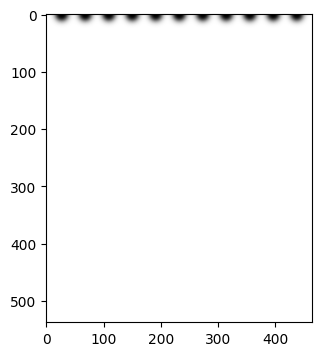

In [2]:
def create_kernel(im):
    """
    Creates a filter kernel in the frequency domain.

    Args:
        im: np.array of shape [H, W]
    Returns:
        kernel: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    kernel = np.ones_like(im)
    H, W = im.shape

    # Gaussian filter
    sigma = 7    # width of Gaussian notches

    N_dots = 2*5  # Total number of dots, symmetricaly placed along the horizontal axis
    distance = 200/(N_dots//2)+1  # Distance between two consecutive dots

    positions = [(W//2 + i * distance, 0) for i in range(-N_dots//2, N_dots//2+1)]  # List of positions of the dots

    # Apply Gaussian Notch filter at each identified position
    for (x0, y0) in positions:
        # Create a notch at (x0, y0) and its symmetric counterpart
        y, x = np.ogrid[:H, :W]                         # Grid of size H x W
        notch = np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * sigma**2))    # Gaussian notch
        symmetric_notch = np.exp(-((x - (W - x0))**2 + (y - y0)**2) / (2 * sigma**2))
        kernel *= (1 - notch) * (1 - symmetric_notch)

    ### END YOUR CODE HERE ###
    return kernel

plt.figure(figsize=[12, 4])
plt.imshow(create_kernel(np.zeros([538, 464])).real, cmap='gray')

(538, 464)
Saving image to: image_processed\moon_filtered.png


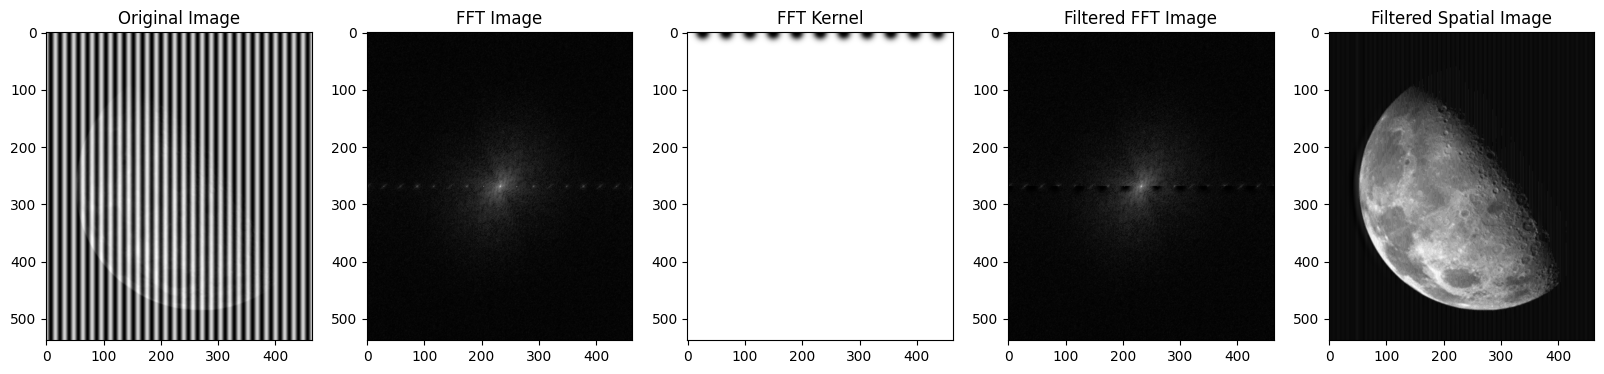

In [3]:
if __name__ == "__main__":
    # Changing this code should not be needed!
    
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)
    print(im.shape)
    kernel = create_kernel(im)        
    # Note that this function is from your own implementation of convolve_im_freq from freq_1.ipynb
    im_filtered = convolve_im_freq(im, kernel, True) 
    
    utils.save_im("moon_filtered.png", utils.normalize(im_filtered))